In [7]:
# 311 Machine Learning HW 1
# Rowan Mascarenhas - ID: 1797865 - 2/5/24

import pandas
from pandas.plotting import scatter_matrix
from IPython.display import display
import numpy

import matplotlib.pyplot as pl
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [10]:
dataset = pandas.read_csv('BDOShoham.csv') # read 'BDOShaham' table
dataset = dataset.dropna()  # Remove missing rows
print('Table imported and formatted. \n')

# Problem 2: Predict 'FlowPattern' using these three features:  'Vsl', 'Vsg', 'Ang' ?

X_name = [ 'Vsl', 'Vsg', 'Ang' ]
X = dataset[X_name]      
y_name = ['FlowPattern']
y = dataset[y_name]
print('XY variables established.\n')

Table imported and formatted. 

XY variables established.



Table: Display (top and bottom 3):


,Vsl,Vsg,Ang
0,6.3,0.025,0.0
1,4.0,0.040,0.0
2,6.3,0.040,0.0
3,4.0,0.063,0.0
4,6.3,0.063,0.0
5,4.0,0.100,0.0
6,6.3,0.100,0.0
7,4.0,0.160,0.0
8,6.3,0.160,0.0
9,4.0,0.400,0.0


,Vsl,Vsg,Ang
5670,2.70096,15.8561,-80.0
5671,1.58784,15.8394,-80.0
5672,1.05338,16.0692,-80.0
5673,1.05397,25.7439,-80.0
5674,1.66789,26.1616,-80.0


Scatter plots:


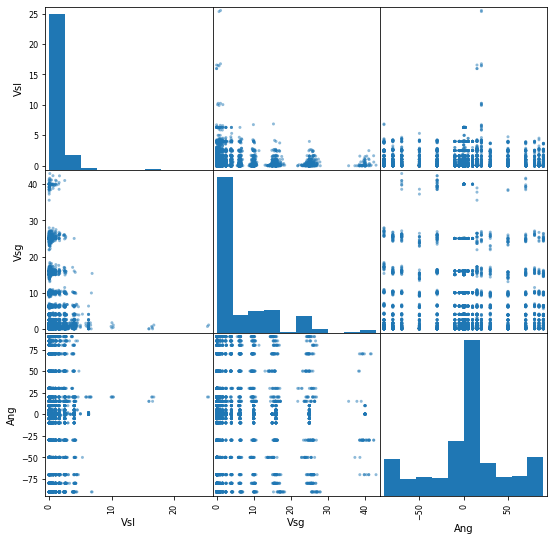

Summary of X:


,Vsl,Vsg,Ang
count,5675.000000,5675.000000,5675.000000
mean,0.899747,6.222612,2.727401
std,1.425159,8.699644,46.202822
min,0.001100,0.003720,-90.000000
25%,0.016000,0.162055,-10.000000
50%,0.250000,1.600000,0.500000
75%,1.500000,10.000000,20.000000
max,25.517000,42.956200,90.000000


In [25]:
# Problem 1: Create tables and graphs
from IPython.display import display

print( 'Table: Display (top and bottom 3):' )
display(X.head(11)) # Pulls top 11 values from 'X'
display(X.tail(5)) # Pulls bottom 5 values

print('Scatter plots:')
scatter_matrix(X, figsize=(9, 9))
pl.show()

print( 'Summary of X:' )
display(X.describe())
print('\n')

In [72]:
seed = 42 # setting the seed allows for repeatability
test_pct = 0.20   # keep 20% of data for tests
seed = 42          # test samples
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
scoring = 'accuracy'
print('Training and Testing datasets set up.')

Training and Testing datasets set up.


 Method: Linear 
 Mean: -0.007321 (Standard deviation of 1.197240)
 Max deviation: 3.387043



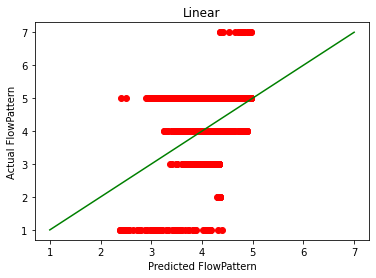

 Method: KNR 
 Mean: -0.066432 (Standard deviation of 0.713761)
 Max deviation: 4.000000



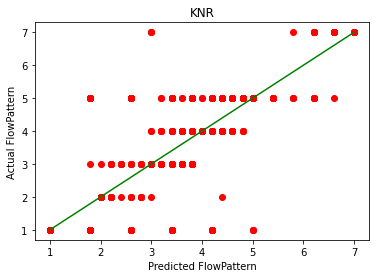

/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Method: LR 
 Mean: 0.407048 (Standard deviation of 1.694307)
 Max deviation: 6.000000



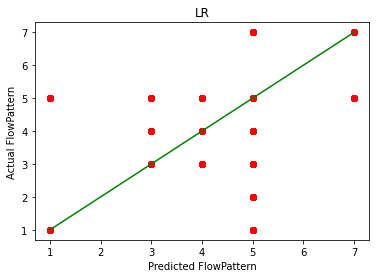

 Method: Ridge 
 Mean: 0.599119 (Standard deviation of 1.507959)
 Max deviation: 4.000000



/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


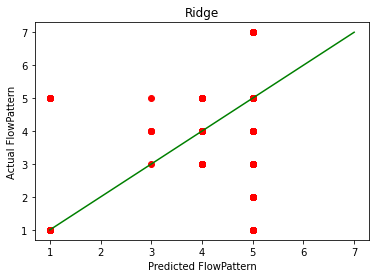

/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 Method: kNN 
 Mean: -0.061674 (Standard deviation of 1.882788)
 Max deviation: 6.000000



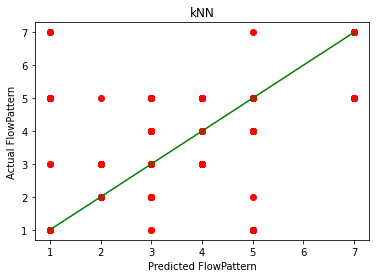

done 



In [73]:
# Problem 3: Train 2+ models:
models = []
models.append(('Linear', LinearRegression() )) 
models.append(('KNR', KNeighborsRegressor() ))
models.append(('LR', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('Ridge', RidgeClassifier(alpha=10)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)))

k4folds = 5
results = []
names = []
for name, modelName in models:
    modelName.fit(X_train, y_train)
    y_predicted = modelName.predict(X_test)
    y_actual = numpy.asarray(y_test)
    y_error = y_predicted - y_actual
    results.append(y_error)
    
    statement = " Method: %s \n Mean: %f (Standard deviation of %f)\n Max deviation: %f\n" % (name, y_error.mean(), y_error.std(), y_error.max())
    print(statement)
    LL = min([min(y_predicted), min(y_actual)])
    UR = max([max(y_predicted), max(y_actual)])
    pl.title(name)
    pl.plot(y_predicted, y_actual,'ro')
    pl.plot([LL,UR],[LL,UR], 'g-')
    pl.xlabel('Predicted FlowPattern')
    pl.ylabel('Actual FlowPattern')
    pl.show()
    
print('done \n')

In [68]:
#     Evaluate models
#     - Linear points are limited horizontally, between a range of 2-5
#     - KNR spreads the points around more evenly to match the line
#     - LR and Ridge are mostly accurate with a few outliers
#          -  kNN is the least accurate on average, but very similar to LR and Ridge

ValueError: X must have 2 or fewer dimensions

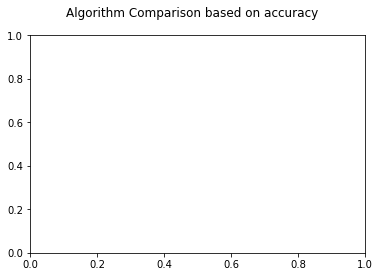

In [66]:
# Compare Algorithms
fig = pl.figure()
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()

/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Method: LR 
 Mean: 0.442443 (Standard deviation of 1.734611)
 Max deviation: 6.000000



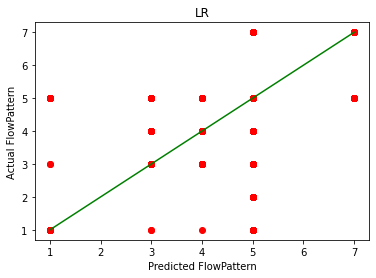

/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Method: Ridge 
 Mean: 0.596711 (Standard deviation of 1.527377)
 Max deviation: 4.000000



/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


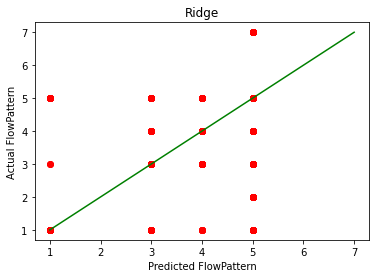

/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 Method: kNN 
 Mean: -0.019186 (Standard deviation of 1.891486)
 Max deviation: 6.000000



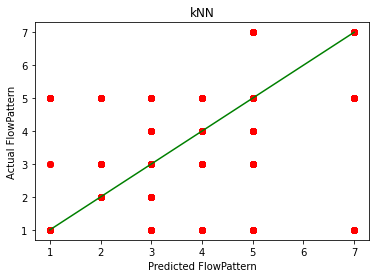

done 



In [80]:
# Problem 4: Modify hyperparameters

# Note: algorithms are re-created below with differences
# Split data into training and testing datasets

test_pct = 0.9   # percentage of data points reserved for testing performance.
seed = 100       # Seed in examples above was 42, increasing sample size allows for more accurate results, up to a point 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)


models = []
models.append(('LR', LogisticRegression(random_state=0))) # default=’lbfgs’
models.append(('Ridge', RidgeClassifier(alpha=1000))) # changed alpha
models.append(('kNN', KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='ball_tree', p=1))) # all parameters changed


results = []
names = []
for name, modelName in models:
    modelName.fit(X_train, y_train)
    y_predicted = modelName.predict(X_test)
    y_actual = numpy.asarray(y_test)
    y_error = y_predicted - y_actual
    results.append(y_error)
    
    statement = " Method: %s \n Mean: %f (Standard deviation of %f)\n Max deviation: %f\n" % (name, y_error.mean(), y_error.std(), y_error.max())
    print(statement)
    LL = min([min(y_predicted), min(y_actual)])
    UR = max([max(y_predicted), max(y_actual)])
    pl.title(name)
    pl.plot(y_predicted, y_actual,'ro')
    pl.plot([LL,UR],[LL,UR], 'g-')
    pl.xlabel('Predicted FlowPattern')
    pl.ylabel('Actual FlowPattern')
    pl.show()
    
print('done \n')

 Method: Linear 
 Mean: -0.195682 (Standard deviation of 1.775726)
 Max deviation: 2.849631



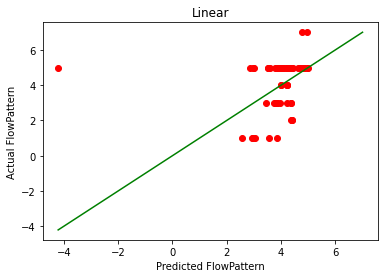

 Method: KNR 
 Mean: -0.087719 (Standard deviation of 0.657499)
 Max deviation: 1.600000



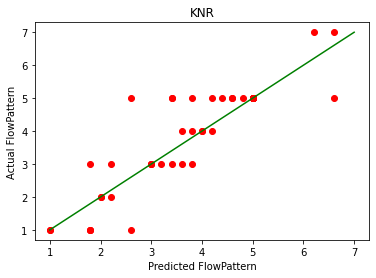

/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Method: LR 
 Mean: 0.368421 (Standard deviation of 1.994298)
 Max deviation: 6.000000



/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


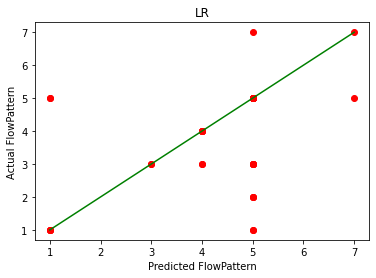

/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


 Method: Ridge 
 Mean: 0.368421 (Standard deviation of 1.922634)
 Max deviation: 4.000000



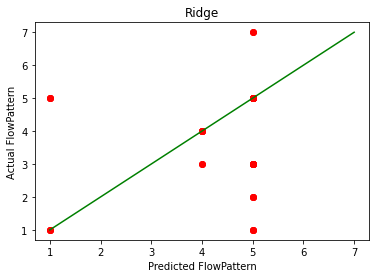

/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 Method: kNN 
 Mean: -0.017544 (Standard deviation of 2.001231)
 Max deviation: 6.000000



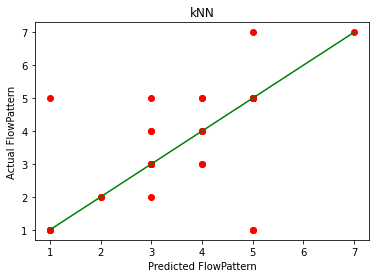

done 



In [79]:
# Problem 5: Modify hyperparameters to improve the accuracy of the model as much as possible

test_pct = 0.01   # reserve 1% for testing. Changing this value does show fewer point, but now most points are accurately placed
seed = 400    # Seed in examples above was 42, increasing sample size allows for more accurate results, up to a point 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)

# Algorithms
models = []
models.append(('Linear', LinearRegression() )) 
models.append(('KNR', KNeighborsRegressor() ))
models.append(('LR', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('Ridge', RidgeClassifier(alpha=100)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=50, weights='uniform', algorithm='auto', p=2)))

results = []
names = []
for name, modelName in models:
    modelName.fit(X_train, y_train)
    y_predicted = modelName.predict(X_test)
    y_actual = numpy.asarray(y_test)
    y_error = y_predicted - y_actual
    results.append(y_error)
    
    statement = " Method: %s \n Mean: %f (Standard deviation of %f)\n Max deviation: %f\n" % (name, y_error.mean(), y_error.std(), y_error.max())
    print(statement)
    LL = min([min(y_predicted), min(y_actual)])
    UR = max([max(y_predicted), max(y_actual)])
    pl.title(name)
    pl.plot(y_predicted, y_actual,'ro')
    pl.plot([LL,UR],[LL,UR], 'g-')
    pl.xlabel('Predicted FlowPattern')
    pl.ylabel('Actual FlowPattern')
    pl.show()
    
print('done \n')

#   Problem 5: KNR have the overall highest accuracy with seed adjustments, although all models show improvement over original iterations. 
    - Linear and KNR use the same changes, but linear appears worse now, while KNR is better overall
         - KNR prefers scattering most points between 3-5 
    - LR is now noticeably better than Ridge. But still have a few points off for x=5
    - KNN is marginally more accurate with its points when adjusting nearest neighbors